In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pathlib
import os
os.sys.path
import glob as gb
import glob
import cv2
import PIL
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras import layers
from tensorflow.keras.models import Model,Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout,BatchNormalization
from keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [3]:
import zipfile
zf = "seg_train.zip"
target_dir = "seg_train"
zfile = zipfile.ZipFile(zf)
zfile.extractall(target_dir)


zf1 = "seg_pred.zip"
target_dir1 = "seg_pred"
zfile = zipfile.ZipFile(zf1)
zfile.extractall(target_dir1)

zf2 = "seg_test.zip"
target_dir2 = "seg_test"
zfile = zipfile.ZipFile(zf2)
zfile.extractall(target_dir2)

In [4]:
#data path
trainpath = 'seg_train/seg_train/seg_train/'
testpath = 'seg_test/seg_test/seg_test/'
predpath='seg_pred/seg_pred/seg_pred/'

In [5]:
os.listdir(trainpath)

['forest', 'buildings', 'glacier', 'street', 'mountain', 'sea']

In [6]:
os.listdir(testpath)

['forest', 'buildings', 'glacier', 'street', 'mountain', 'sea']

In [7]:
#reading training images
new_size=224    
X_train = []
y_train = []
for folder in  os.listdir(trainpath) : 
    print( 'folder name is : ', folder)
    files = gb.glob(pathname= str( trainpath  + folder + '/*.jpg'))
    print( 'numbers of images are : ', len(files))
    for file in files: 
        image_class = {'buildings': 0, 'forest': 1,'glacier': 2 ,'mountain': 3 ,'sea': 4 ,'street':5}
        orignal_image = cv2.imread(file)
        image = cv2.cvtColor(orignal_image, cv2.COLOR_BGR2RGB)
        resized_image = cv2.resize(image , (new_size,new_size))
        X_train.append(resized_image)
        y_train.append(image_class[folder])       
#check items in X_train
print("items in X_train is:       ",len(X_train) , " items") 
print("items in y_train is:       ",len(y_train) , " items") 

folder name is :  forest
numbers of images are :  2271
folder name is :  buildings
numbers of images are :  2191
folder name is :  glacier
numbers of images are :  2404
folder name is :  street
numbers of images are :  2382
folder name is :  mountain
numbers of images are :  2512
folder name is :  sea
numbers of images are :  2274
items in X_train is:        14034  items
items in y_train is:        14034  items


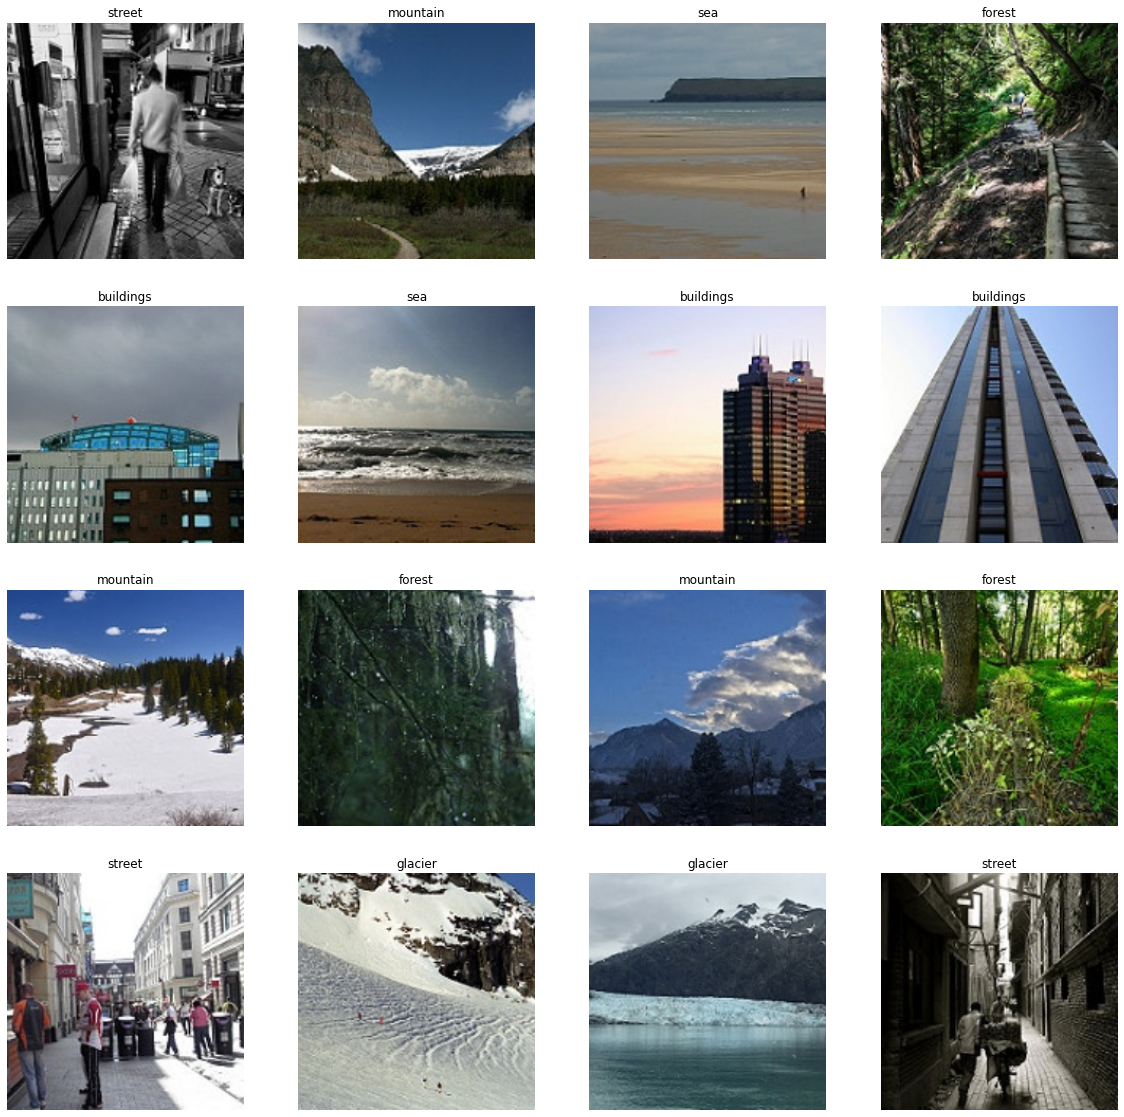

In [8]:
#showing training images with labels
plt.figure(figsize=(20,20))
for n , i in enumerate(list(np.random.randint(0,len(X_train ),16))) : 
    plt.subplot(4,4,n+1)
    plt.imshow(X_train [i])   
    plt.axis('off')
    classes = {'buildings': 0, 'forest': 1,'glacier': 2 ,'mountain': 3 ,'sea': 4 ,'street':5}
    def ImageClass(n):
        for x , y in classes.items():
            if n == y :
                return x
    plt.title(ImageClass(y_train[i]))

In [9]:
#reading testing images
new_size=224    
X_test = []
y_test = []
for folder in  os.listdir(testpath ) : 
    print( 'folder name is : ', folder)
    files = gb.glob(pathname= str( testpath  + folder + '/*.jpg'))
    print( 'numbers of images are : ', len(files))
    for file in files: 
        image_class = {'buildings': 0, 'forest': 1,'glacier': 2 ,'mountain': 3 ,'sea': 4 ,'street':5}
        orignal_image = cv2.imread(file)
        image = cv2.cvtColor(orignal_image, cv2.COLOR_BGR2RGB)
        resized_image = cv2.resize(image , (new_size,new_size))
        X_test.append(resized_image)
        y_test.append(image_class[folder])
#check items in X_test
print("items in X_test is:       ",len(X_test) , " items") 
print("items in y_test is:       ",len(y_test) , " items") 

folder name is :  forest
numbers of images are :  474
folder name is :  buildings
numbers of images are :  437
folder name is :  glacier
numbers of images are :  553
folder name is :  street
numbers of images are :  501
folder name is :  mountain
numbers of images are :  525
folder name is :  sea
numbers of images are :  510
items in X_test is:        3000  items
items in y_test is:        3000  items


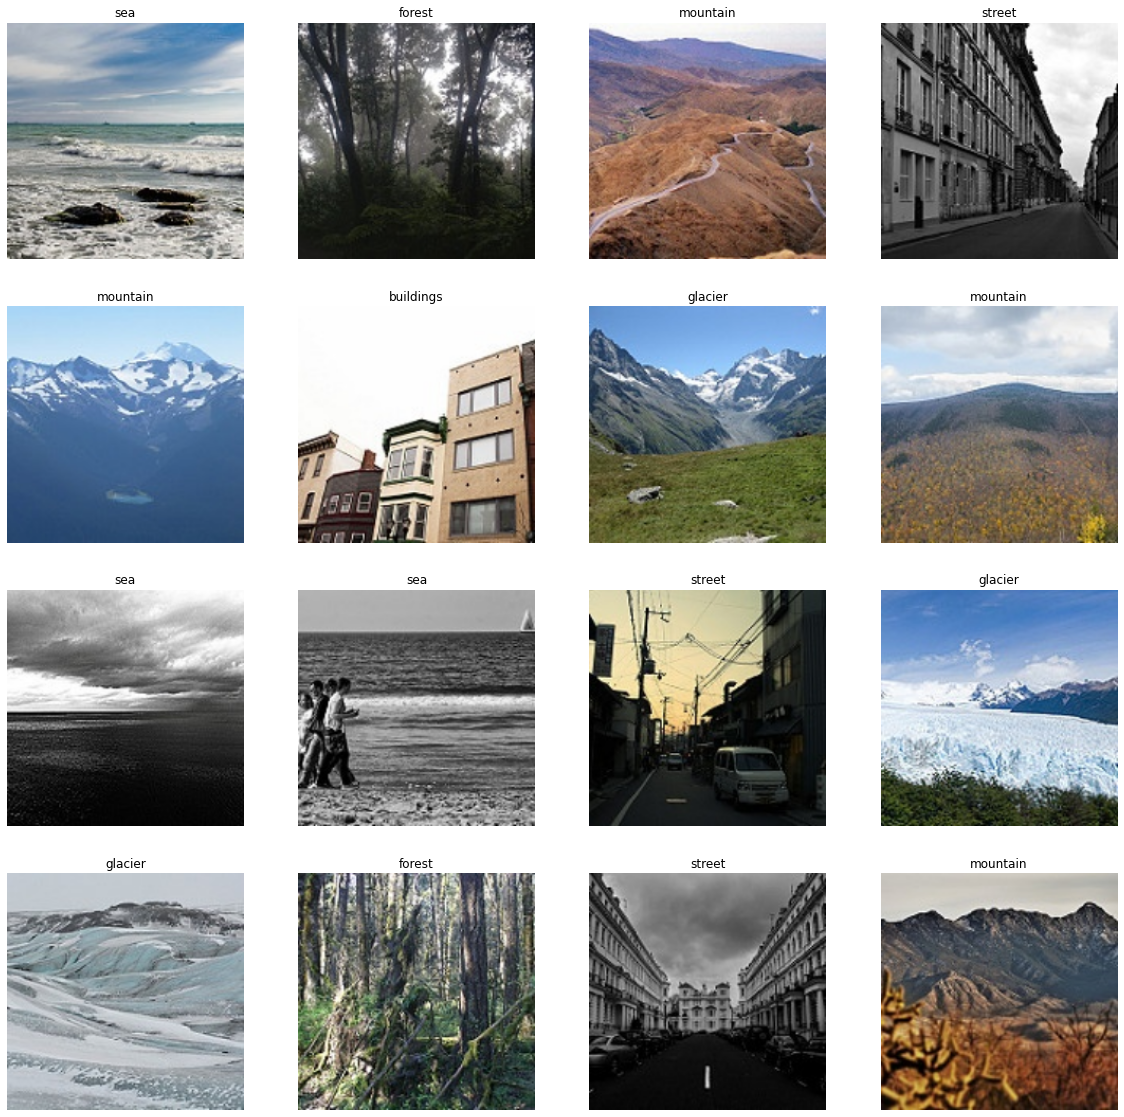

In [10]:
#showing testing images with labels
plt.figure(figsize=(20,20))
for n , i in enumerate(list(np.random.randint(0,len(X_test),16))) : 
    plt.subplot(4,4,n+1)
    plt.imshow(X_test[i])   
    plt.axis('off')
    classes ={'buildings': 0, 'forest': 1,'glacier': 2 ,'mountain': 3 ,'sea': 4 ,'street':5}
    def ImageClass(n):
        for x , y in classes.items():
            if n == y :
                return x
    plt.title(ImageClass(y_test[i]))

In [11]:
#reading predict images
predpath='seg_pred/seg_pred/seg_pred/'
new_size=224
x_pred=[]
files=gb.glob(pathname= str( predpath + '/*.jpg'))

for file in files:
    imag=cv2.imread(file)
   
    image = cv2.cvtColor(imag, cv2.COLOR_BGR2RGB)

    imagee= cv2.resize(image , (new_size,new_size))

    x_pred.append(list(imagee))

In [12]:
#converting all X_train data to array
X_train = np.array(X_train)
y_train = np.array(y_train)
print("X_train shape  :" ,X_train.shape)
print("y_train shape :", y_train.shape)

X_train shape  : (14034, 224, 224, 3)
y_train shape : (14034,)


In [13]:
#converting all test data to array
X_test = np.array(X_test)
y_test = np.array(y_test)
print("X_test shape  :" ,X_test.shape)
print("y_test shape :", y_test.shape)

X_test shape  : (3000, 224, 224, 3)
y_test shape : (3000,)


In [14]:
#converting all predict data to array 
x_pred = np.array(x_pred)
print("x_pred shape  :" ,x_pred.shape)

x_pred shape  : (7301, 224, 224, 3)


In [15]:
#Normalizing
X_train = X_train / 255.0
X_test = X_test / 255.0
x_pred = x_pred / 255.0

In [17]:
model = Sequential([
    Conv2D(200,3, padding = "same", activation = "relu" ,input_shape=(224, 224, 3)),
    MaxPooling2D(5,5),
    
    Conv2D(150,3, padding = "same",activation = "relu"),
    
    Conv2D(120,3, padding = "same", activation = "relu"),
    Dropout(rate=0.5),
   
    Conv2D(80,3, padding = "same",activation = "relu"),
    
    Conv2D(50,3, padding = "same", activation = "relu"),
    MaxPooling2D(5,5),
  
   
    
    Flatten(),
    Dense(120,activation = "relu"),
    Dense(100,activation = "relu"),
    Dense(50,activation = "relu"),
   
    Dropout(rate=0.5),
    
    Dense(6, activation='softmax')
])

In [18]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 224, 224, 200)     5600      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 44, 44, 200)       0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 44, 44, 150)       270150    
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 44, 44, 120)       162120    
_________________________________________________________________
dropout_2 (Dropout)          (None, 44, 44, 120)       0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 44, 44, 80)        86480     
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 44, 44, 50)       

In [19]:
#compliling model
opt=tf.keras.optimizers.Adam(0.0001)
model.compile(optimizer=opt,loss='sparse_categorical_crossentropy' , metrics=['accuracy'])

In [20]:
#Setting stopping criteria for the training
patnce = 2 
early_stopping = EarlyStopping(monitor='val_loss', patience=patnce, verbose=1)

In [21]:
batch_size = 64
test_data_gen  = ImageDataGenerator()
test = test_data_gen.flow(
      X_test,
      y_test,
      shuffle=True, 
      batch_size=batch_size
      )

In [22]:
#fit the model
history= model.fit(X_train,y_train,validation_data=test,epochs=10)

Train on 14034 samples, validate for 47 steps
Epoch 1/10
14034/14034 [==============================] - 1786s 127ms/sample - loss: 1.4013 - accuracy: 0.4256 - val_loss: 1.0756 - val_accuracy: 0.5850
Epoch 2/10
14034/14034 [==============================] - 1749s 125ms/sample - loss: 1.1323 - accuracy: 0.5586 - val_loss: 1.0449 - val_accuracy: 0.6007
Epoch 3/10
14034/14034 [==============================] - 1741s 124ms/sample - loss: 1.0344 - accuracy: 0.6042 - val_loss: 0.8966 - val_accuracy: 0.6773
Epoch 4/10
14034/14034 [==============================] - 1754s 125ms/sample - loss: 0.9335 - accuracy: 0.6563 - val_loss: 0.7821 - val_accuracy: 0.7357
Epoch 5/10
14034/14034 [==============================] - 1744s 124ms/sample - loss: 0.8259 - accuracy: 0.7085 - val_loss: 0.6700 - val_accuracy: 0.7677
Epoch 6/10
14034/14034 [==============================] - 1759s 125ms/sample - loss: 0.7492 - accuracy: 0.7455 - val_loss: 0.6227 - val_accuracy: 0.7867
Epoch 7/10
14034/14034 [============

In [23]:
prediction = model.predict(x_pred)

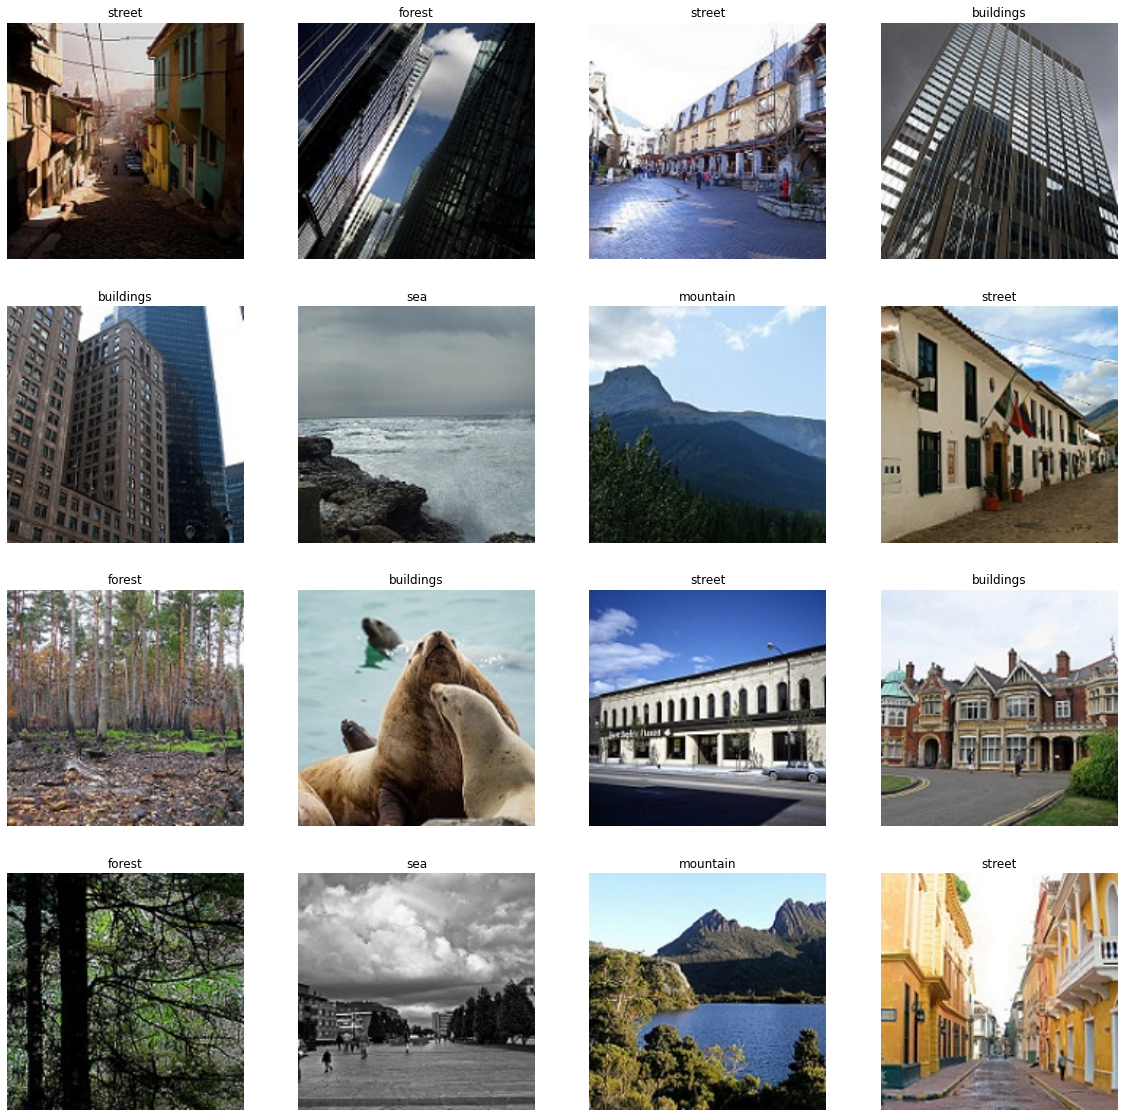

In [24]:
plt.figure(figsize=(20,20))
for n , i in enumerate(list(np.random.randint(0,len(x_pred),16))) : 
    plt.subplot(4,4,n+1)
    plt.imshow(x_pred[i])
    plt.axis('off')
    classes ={'buildings': 0, 'forest': 1,'glacier': 2 ,'mountain': 3 ,'sea': 4 ,'street':5}
    def ImageClass(n):
        for x , y in classes.items():
            if n == y :
                return x
    plt.title(ImageClass(np.argmax(prediction[i])))

CNN Model Validation

In [25]:
#Cross validation Function
def crossValidation(n_folds, X, y, model):
  modelHistory = []
  for i in range(n_folds):
      print("Training on Fold: ",i+1)
      modelHistory.append(model.fit(X, y, epochs=10, callbacks=[early_stopping],
              verbose=1, validation_split=0.1))
      print("======="*12, end="\n\n\n")

  return modelHistory

In [26]:
#10 fold cross validation
modelHistory = crossValidation(10, X_train, y_train, model)

Training on Fold:  1
Train on 12630 samples, validate on 1404 samples
Epoch 1/10
12630/12630 [==============================] - 1652s 131ms/sample - loss: 0.5364 - accuracy: 0.8160 - val_loss: 0.5248 - val_accuracy: 0.8383
Epoch 2/10
12630/12630 [==============================] - 1618s 128ms/sample - loss: 0.5283 - accuracy: 0.8229 - val_loss: 0.8858 - val_accuracy: 0.6481
Epoch 3/10
12630/12630 [==============================] - 1613s 128ms/sample - loss: 0.5038 - accuracy: 0.8322 - val_loss: 0.5670 - val_accuracy: 0.8162
Epoch 00003: early stopping


Training on Fold:  2
Train on 12630 samples, validate on 1404 samples
Epoch 1/10
12630/12630 [==============================] - 1647s 130ms/sample - loss: 0.4922 - accuracy: 0.8332 - val_loss: 0.7457 - val_accuracy: 0.7315
Epoch 2/10
12630/12630 [==============================] - 1608s 127ms/sample - loss: 0.4723 - accuracy: 0.8386 - val_loss: 0.7619 - val_accuracy: 0.7301
Epoch 3/10
12630/12630 [==============================] - 1641s 1

Confusion Matrix of CNN Model

In [27]:
predict = model.predict(X_test) 
pred_labels = np.argmax(predict, axis = 1)

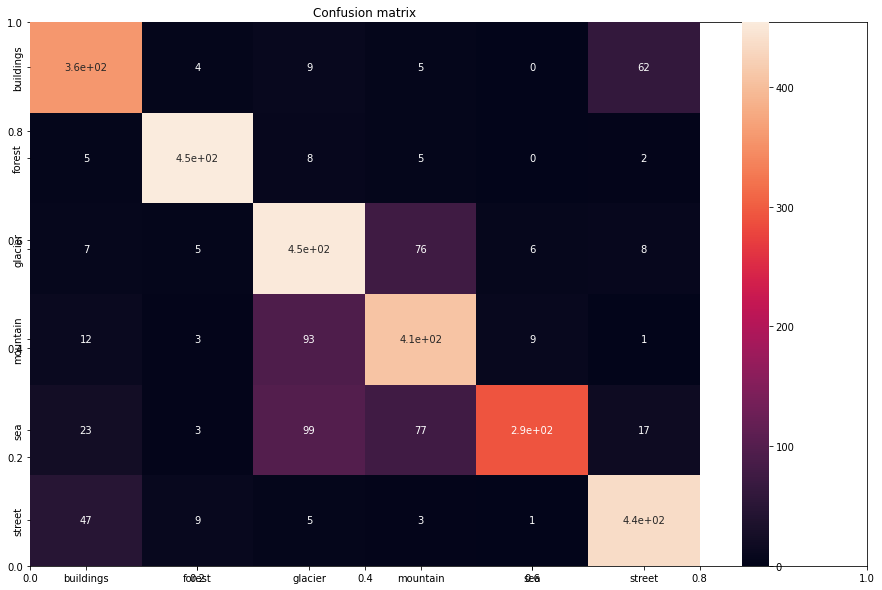

In [28]:
from sklearn.metrics import confusion_matrix
import sklearn.metrics as metrics
import seaborn as sn
CM = confusion_matrix(y_test, pred_labels)
fig, ax = plt.subplots(figsize =(15,10))
ax = plt.axes()
image_categories = ['buildings','forest','glacier','mountain','sea','street']
sn.heatmap(CM, annot=True, 
           annot_kws={"size": 10}, 
           xticklabels=image_categories, 
           yticklabels=image_categories, ax = ax)
ax.set_title('Confusion matrix')
plt.show()

Transfer Learning Model Using VGG

In [29]:
#defining the data generators
from tensorflow.keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(rescale=1/255.,
                            horizontal_flip=True,
                            width_shift_range=0.1,
                            height_shift_range=0.1)

test_datagen = ImageDataGenerator(rescale=1/255.)

In [31]:
d_input_shape = (150,150)
batch_size = 16
traingen = datagen.flow_from_directory('seg_train/seg_train/seg_train/',
                                      target_size = d_input_shape,
                                      class_mode='categorical',
                                      batch_size=batch_size,
                                      shuffle=False)

testgen = test_datagen.flow_from_directory('seg_test/seg_test/seg_test',
                                      target_size = d_input_shape,
                                      class_mode='categorical',
                                      batch_size=batch_size,
                                      shuffle=False)

Found 14034 images belonging to 6 classes.
Found 3000 images belonging to 6 classes.


In [32]:
model = Sequential()
L2 = tf.keras.regularizers.l2(0.001)
input_shape = (150,150,3)


model = tf.keras.applications.VGG19(include_top=False, input_shape=input_shape)
for layer in model.layers:
    layer.trainable=False
flat = Flatten()(model.layers[-1].output)
hidden1 = Dense(128,activation='relu')(flat)
output = Dense(6,activation='softmax')(hidden1)

model = Model(inputs=model.inputs, outputs=output)
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0     

In [36]:
#compile the model
opt=tf.keras.optimizers.Adam(0.001)
model.compile(loss = 'categorical_crossentropy', optimizer= opt, metrics=['accuracy'])

In [37]:
history = model.fit(traingen,
                   epochs=10,
                   validation_data = testgen)

2022-05-01 16:48:50.303878: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 107 of 878
2022-05-01 16:49:00.291983: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 215 of 878
2022-05-01 16:49:10.311846: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 319 of 878
2022-05-01 16:49:20.279247: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 422 of 878
2022-05-01 16:49:30.280643: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 526 of 878
2022-05-01 16:49:40.366882: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 632 of 878
2022-05-01 16:49:50.281437: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer 

Train for 878 steps, validate for 188 steps
Epoch 1/10


2022-05-01 16:50:15.548682: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 107 of 878
2022-05-01 16:50:25.581291: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 216 of 878
2022-05-01 16:50:35.585363: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 327 of 878
2022-05-01 16:50:45.568048: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 439 of 878
2022-05-01 16:50:55.608143: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 553 of 878
2022-05-01 16:51:05.620080: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 663 of 878
2022-05-01 16:51:15.583083: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer 

878/878 [==============================] - 2727s 3s/step - loss: 0.7777 - accuracy: 0.7072 - val_loss: 0.4760 - val_accuracy: 0.8183
Epoch 2/10


2022-05-01 17:35:41.046337: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 137 of 878
2022-05-01 17:35:51.042648: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 280 of 878
2022-05-01 17:36:01.050868: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 419 of 878
2022-05-01 17:36:11.051718: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 526 of 878
2022-05-01 17:36:21.112293: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 636 of 878
2022-05-01 17:36:31.022849: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 739 of 878
2022-05-01 17:36:41.105250: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer 

878/878 [==============================] - 2731s 3s/step - loss: 0.4982 - accuracy: 0.8044 - val_loss: 0.3965 - val_accuracy: 0.8533
Epoch 3/10


2022-05-01 18:21:11.786941: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 106 of 878
2022-05-01 18:21:21.793443: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 213 of 878
2022-05-01 18:21:31.803158: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 317 of 878
2022-05-01 18:21:41.832642: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 428 of 878
2022-05-01 18:21:51.784322: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 535 of 878
2022-05-01 18:22:01.827525: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 643 of 878
2022-05-01 18:22:11.802805: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer 

878/878 [==============================] - 2734s 3s/step - loss: 0.4537 - accuracy: 0.8281 - val_loss: 0.4338 - val_accuracy: 0.8413
Epoch 4/10


2022-05-01 19:06:46.342879: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 108 of 878
2022-05-01 19:06:56.272548: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 210 of 878
2022-05-01 19:07:06.314437: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 317 of 878
2022-05-01 19:07:16.280863: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 424 of 878
2022-05-01 19:07:26.335543: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 532 of 878
2022-05-01 19:07:36.302432: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 635 of 878
2022-05-01 19:07:46.337047: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer 

878/878 [==============================] - 2733s 3s/step - loss: 0.4210 - accuracy: 0.8416 - val_loss: 0.4465 - val_accuracy: 0.8453
Epoch 5/10


2022-05-01 19:52:19.670352: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 108 of 878
2022-05-01 19:52:29.659598: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 213 of 878
2022-05-01 19:52:39.612747: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 318 of 878
2022-05-01 19:52:49.642847: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 430 of 878
2022-05-01 19:52:59.688434: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 539 of 878
2022-05-01 19:53:09.670841: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 646 of 878
2022-05-01 19:53:19.688153: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer 

878/878 [==============================] - 2735s 3s/step - loss: 0.4041 - accuracy: 0.8503 - val_loss: 0.4189 - val_accuracy: 0.8370
Epoch 6/10


2022-05-01 20:37:55.099887: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 104 of 878
2022-05-01 20:38:05.127153: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 209 of 878
2022-05-01 20:38:15.094911: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 315 of 878
2022-05-01 20:38:25.124062: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 426 of 878
2022-05-01 20:38:35.128044: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 534 of 878
2022-05-01 20:38:45.122897: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 641 of 878
2022-05-01 20:38:55.117933: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer 

878/878 [==============================] - 2729s 3s/step - loss: 0.3837 - accuracy: 0.8546 - val_loss: 0.4529 - val_accuracy: 0.8273
Epoch 7/10


2022-05-01 21:23:23.733856: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 108 of 878
2022-05-01 21:23:33.727879: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 215 of 878
2022-05-01 21:23:43.651928: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 311 of 878
2022-05-01 21:23:53.673808: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 419 of 878
2022-05-01 21:24:03.699160: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 524 of 878
2022-05-01 21:24:13.655836: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 630 of 878
2022-05-01 21:24:23.727332: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer 

878/878 [==============================] - 2730s 3s/step - loss: 0.3795 - accuracy: 0.8548 - val_loss: 0.3664 - val_accuracy: 0.8713
Epoch 8/10


2022-05-01 22:08:53.756028: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 108 of 878
2022-05-01 22:09:03.719494: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 214 of 878
2022-05-01 22:09:13.786458: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 320 of 878
2022-05-01 22:09:23.774543: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 429 of 878
2022-05-01 22:09:33.759326: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 534 of 878
2022-05-01 22:09:43.813847: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 641 of 878
2022-05-01 22:09:53.767819: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer 

878/878 [==============================] - 2732s 3s/step - loss: 0.3716 - accuracy: 0.8588 - val_loss: 0.4205 - val_accuracy: 0.8407
Epoch 9/10


2022-05-01 22:54:25.379555: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 107 of 878
2022-05-01 22:54:35.428027: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 214 of 878
2022-05-01 22:54:45.437824: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 320 of 878
2022-05-01 22:54:55.444224: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 430 of 878
2022-05-01 22:55:05.407843: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 538 of 878
2022-05-01 22:55:15.432684: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 645 of 878
2022-05-01 22:55:25.355711: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer 

878/878 [==============================] - 2731s 3s/step - loss: 0.3627 - accuracy: 0.8653 - val_loss: 0.3472 - val_accuracy: 0.8640
Epoch 10/10


2022-05-01 23:39:56.820253: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 107 of 878
2022-05-01 23:40:06.853745: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 214 of 878
2022-05-01 23:40:16.850434: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 318 of 878
2022-05-01 23:40:26.783675: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 427 of 878
2022-05-01 23:40:36.821083: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 528 of 878
2022-05-01 23:40:46.841379: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 634 of 878
2022-05-01 23:40:56.779917: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer 

878/878 [==============================] - 2731s 3s/step - loss: 0.3388 - accuracy: 0.8709 - val_loss: 0.3488 - val_accuracy: 0.8747


In [38]:
#evaluate the accuracy
metric = model.evaluate(testgen)
print('The Loss of evluation is: {}'.format(metric[0]))
print('The Accuracy of evluation is: {:.2}'.format(metric[1]))

188/188 [==============================] - 465s 2s/step - loss: 0.3488 - accuracy: 0.8747
The Loss of evluation is: 0.34875384094583695
The Accuracy of evluation is: 0.87
